In [20]:
# importing needed libraries
import numpy as np
from numpy import pi
from math import dist
from math import sqrt
from math import ceil
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
# For image and video manipulation
from PIL import Image
from PIL import ImageFilter
from IPython.display import display
import glob
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import paired_distances

In [57]:
# defining the idealized distance function
def C1_wrapper(a,b):
    def distance_C1(x, y):
        Y = []
        options = [-1,0,1]
        for option_a in options:
            for option_b in options:
                for option_c in options:
                    Y.append([y[0] + a[0] * option_a + b[0] * option_b, y[1] + a[1] * option_a + b[1] * option_b, y[2] + 2*pi * option_c])

        distances = []
        for y_new in Y: 
            distances.append(dist(x,y_new))

        return min(distances)
    return distance_C1

generate_C1_isoms() traces out the generating cycles along $a$, $b$, and $\theta$.

In [37]:
def generate_C1_isoms(n_isos, a, b):
    j = ceil(n_isos / 3)
    isoms = []
    steps_x = np.linspace(0, a, j)
    steps_y = np.linspace(0, b, j)
    steps_rot = np.linspace(0, 2*pi, j)
    
    for elem in steps_rot:
        isoms.append((0 , 0, elem))    

    for elem in steps_x:
        isoms.append((elem, 0, 0))
        
    for elem in steps_y:
        isoms.append((0, elem, 0))
        
    return isoms

In [23]:
def C2_wrapper(a,b):
    def distance_C2(x, y):

        # no rotations
        Y = []
        options = [-1,0,1]
        for option_a in options:
            for option_b in options:
                Y.append([y[0] + a[0] * option_a + b[0] * option_b, y[1] + a[1] * option_a + b[1] * option_b, y[2]])

        # rotate by pi
        options = [-1,0,1]
        for option_a in options:
            for option_b in options:
                Y.append([a[0] + b[0] - y[0] + a[0] * option_a + b[0] * option_b, a[1] + b[1] - y[1] + a[1] * option_a + b[1] * option_b, y[2] + pi])

        # rotate by -pi
        options = [-1,0,1]
        for option_a in options:
            for option_b in options:
                Y.append([a[0] + b[0] - y[0] + a[0] * option_a + b[0] * option_b, a[1] + b[1] - y[1] + + a[1] * option_a + b[1] * option_b, y[2] - pi])

        distances = []
        for y_new in Y: 
            distances.append(dist(x,y_new))

        return min(distances)
    return distance_C2

generate_C2_isoms() traces out the generating cycles along $a$, $b$, and $\theta$.

In [38]:
def generate_C2_isoms(n_isos, a, b):
    j = ceil(n_isos / 3)
    isoms = []
    steps_x = np.linspace(0, a, j)
    steps_y = np.linspace(0, b, j)
    steps_rot = np.linspace(0, pi, j)
    
    for elem in steps_rot:
        isoms.append((0 , 0, elem))    

    for elem in steps_x:
        isoms.append((elem, 0, 0))
        
    for elem in steps_y:
        isoms.append((0, elem, 0))
        
    return isoms

In [25]:
def C4_wrapper(a): 
    def distance_C4(x, y):

        # no rotation
        Y = []
        options = [-1,0,1]
        for option_1 in options:
            for option_2 in options:
                Y.append([y[0] + a * option_1, y[1] + a * option_2, y[2]])

        # rotate by pi/2
        options = [-1,0,1]
        for option_1 in options:
            for option_2 in options:
                Y.append([a - y[1] + a * option_1, y[0] + a * option_2, y[2] + pi/2])

        # rotate by -pi/2
        options = [-1,0,1]
        for option_1 in options:
            for option_2 in options:
                Y.append([y[1] + a * option_1, -y[0] + a + a * option_2, y[2] - pi/2])

        distances = []
        for y_new in Y: 
            distances.append(dist(x,y_new))

        return min(distances)
    return distance_C4

generate_C4_isoms() traces out the generating cycles along $a$, $b$, and $\theta$.

In [60]:
# isometries that allow rotation up to pi/2
def generate_C4_isoms(n_isos, a):
    j = ceil(n_isos / 3)
    isoms = []
    steps_trans = np.linspace(0, a, j)
    steps_rot = np.linspace(0, pi/2, j)
    
    for elem in steps_rot:
        isoms.append((0 , 0, elem))    

    for elem in steps_trans:
        isoms.append((elem, 0, 0))
        
    for elem in steps_trans:
        isoms.append((0, elem, 0))
        
    return isoms

In [27]:
def C3_wrapper(a):   
    def distance_C3(x, y):

        # no translation in rotation axis
        Y = [y] # no translation in any axis
        for i in [1,-1]:
            Y.append((y[0], y[1]+ i * (3**0.5) * a, y[2])) # front and back
            Y.append((y[0] + i * (3/2) * a, y[1] - (3**0.5)/2 * a, y[2])) # LB and RF
            Y.append((y[0] + i * (3/2) * a, y[1] + (3**0.5)/2 * a, y[2])) # LF and RB

        # rotate by 2pi/3
        Y.append((-1/2 * y[0] - (3**0.5)/2 * y[1], -1/2 * y[1] + (3**0.5)/2 * y[0], y[2] + 2*pi/3)) # only rotation by 2pi/3
        for i in [1,-1]:
            y1 = -1/2 * y[0] - (3**0.5)/2 * y[1]
            y2 = -1/2 * y[1] + (3**0.5)/2 * y[0] 
            Y.append((y1, y2 + i * (3**0.5) * a, y[2] + 2*pi/3)) # front and back
            Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] + 2*pi/3)) # LB and RF
            Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] + 2*pi/3)) # LF and RB    

        # rotate by -2pi/3
        Y.append((-1/2 * y[0] + (3**0.5)/2 * y[1], -1/2 * y[1] - (3**0.5)/2 * y[0], y[2] - 2*pi/3)) # only rotation by -2pi/3
        for i in [1,-1]:
            y1 = -1/2 * y[0]+ (3**0.5)/2 * y[1]
            y2 = -1/2 * y[1] - (3**0.5)/2 * y[0]
            Y.append((y1, y2 + i * (3**0.5) * a, y[2] - 2*pi/3)) # front and back
            Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] - 2*pi/3)) # LB and RF
            Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] - 2*pi/3)) # LF and RB   

        distances = []
        for y_new in Y: 
            distances.append(dist(x,y_new))

        return min(distances)
    return distance_C3

generate_C3_isoms() traces out the generating cycles along $d$,$e$, $a+b$, and $a-c$

In [40]:
# allow only for rotations up to 2pi/3

def generate_C3_isoms(n_isos, a):
    j = ceil(n_isos / 4)
    isoms = []
    tri = (sqrt(3) / 2)
    steps = np.linspace(0, a, j)
    
    for elem in steps:
        isoms.append((elem * 1.5 , -tri * elem, 0))    

    for elem in steps:
        isoms.append((a/2 + elem * 1.5, tri * elem - tri * a, 0))
        
    rotation = np.linspace(0, (2 * pi / 3), j)
    for elem in rotation:
        isoms.append((0, 0, elem))
    for elem in rotation:
        isoms.append((a / 2, -tri * a, elem))
        
    return isoms

In [41]:
def C6_wrapper(a):   
    def distance_C6(x, y):

        # no translation in rotation axis
        Y = [y] # no translation in any axis
        for i in [1,-1]:
            Y.append((y[0], y[1] + i * (3**0.5) * a, y[2])) # front and back
            Y.append((y[0] + i * (3/2) * a, y[1] - (3**0.5)/2 * a, y[2])) # LB and RF
            Y.append((y[0] + i * (3/2) * a, y[1] + (3**0.5)/2 * a, y[2])) # LF and RB

        # rotation by pi/3
        Y.append((1/2 * y[0] - (3**0.5)/2 * y[1], 1/2 * y[1] + (3**0.5)/2 * y[0], y[2] + pi/3)) # only rotation by 2pi/3
        for i in [1,-1]:
            y1 = 1/2 * y[0] - (3**0.5)/2 * y[1]
            y2 = 1/2 * y[1] + (3**0.5)/2 * y[0] 
            Y.append((y1, y2 + i * (3**0.5) * a, y[2] + 2*pi/3)) # front and back
            Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] + pi/3)) # LB and RF
            Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] + pi/3)) # LF and RB    

        # rotation by -pi/3
        Y.append((1/2 * y[0] + (3**0.5)/2 * y[1], 1/2 * y[1] - (3**0.5)/2 * y[0], y[2] - pi/3)) # only rotation by -2pi/3
        for i in [1,-1]:
            y1 = 1/2 * y[0]+ (3**0.5)/2 * y[1]
            y2 = 1/2 * y[1] - (3**0.5)/2 * y[0]
            Y.append((y1, y2 + i * (3**0.5) * a, y[2] - 2*pi/3)) # front and back
            Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] - pi/3)) # LB and RF
            Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] - pi/3)) # LF and RB   

        distances = []
        for y_new in Y: 
            distances.append(dist(x,y_new))

        return min(distances)
    return distance_C6

In [42]:
# only allow rotation up to pi/3
def generate_C6_isoms(n_isos, a):
    X = list(2 * a * np.random.random(2 * n_isos) - a)  
    Y = list((3**0.5) * a * np.random.random(2 * n_isos) - (3**0.5)/2 * a)
    theta = list(pi/3 * np.random.random(2 * n_isos))
    
    i = 0
    hexagon = []
    while len(hexagon) < n_isos:
        if (Y[i] > -(3**0.5) * a + (3**0.5) * X[i]) and (Y[i] > -(3**0.5) * a - (3**0.5) * X[i]) and (Y[i] < (3**0.5) * a + (3**0.5) * X[i]) and (Y[i] < (3**0.5) * a - (3**0.5) * X[i]):  
            hexagon.append((X[i], Y[i], theta[i]))
        i = i + 1
    
    return hexagon

# Comparing ideal distances with pixel distances

Given an image, a lens size, and a translation, this function returns a snapshot after the translation is performed.

In [31]:
def translation_snapshot(img, lens_sz, translation):
    (a,b) = translation 
    translation = (-a,-b)
    (x,y) = upper_left_center(img, translation)
    (length, height) = img.size
    
    lens_corner_x = x - lens_sz/2.0 
    lens_corner_y = y - lens_sz/2.0 
    ret_img = img.crop((lens_corner_x,lens_corner_y, lens_corner_x+lens_sz, lens_corner_y+lens_sz))
    
    #make sure didn't fall off of the image
    (ret_length, ret_height) = ret_img.size
    if (lens_corner_x<0 or lens_corner_y<0 or lens_corner_x+lens_sz>length or lens_corner_y+lens_sz>height):
        print("I came off the page!")
        return False
    return ret_img

In [32]:
def upper_left_center(img, center):
    (x,y) = center
    (l, h) = img.size
    return (l/2.0+x , h/2.0 - y) 

In [33]:
def create_snapshot(img, lens_sz, isometry):
    (x,y,rotation) = isometry
    translation = (x,y)
    # turn from radian to degree
    rotation = 57.2958*rotation
    rot_img = img.rotate(rotation)
    return translation_snapshot(rot_img, lens_sz, translation)

In [47]:
def get_pixel_isom(isoms, img, lens, a):
    scaled_isoms = isoms
    for i in range(len(isoms)):
        e = isoms[i]
        scaled_isoms[i] = ((lens/a)*e[0], (lens/a)*e[1], e[2])
    isom_images = []
    for iso in scaled_isoms:
        isom_images.append(create_snapshot(img, lens, iso))
    ret_lst = []
    for elem in isom_images:
        arr = np.asarray(elem)
        arr = arr.reshape(-1)
        ret_lst.append(arr)
    ret_lst = np.asarray(ret_lst)
    return ret_lst

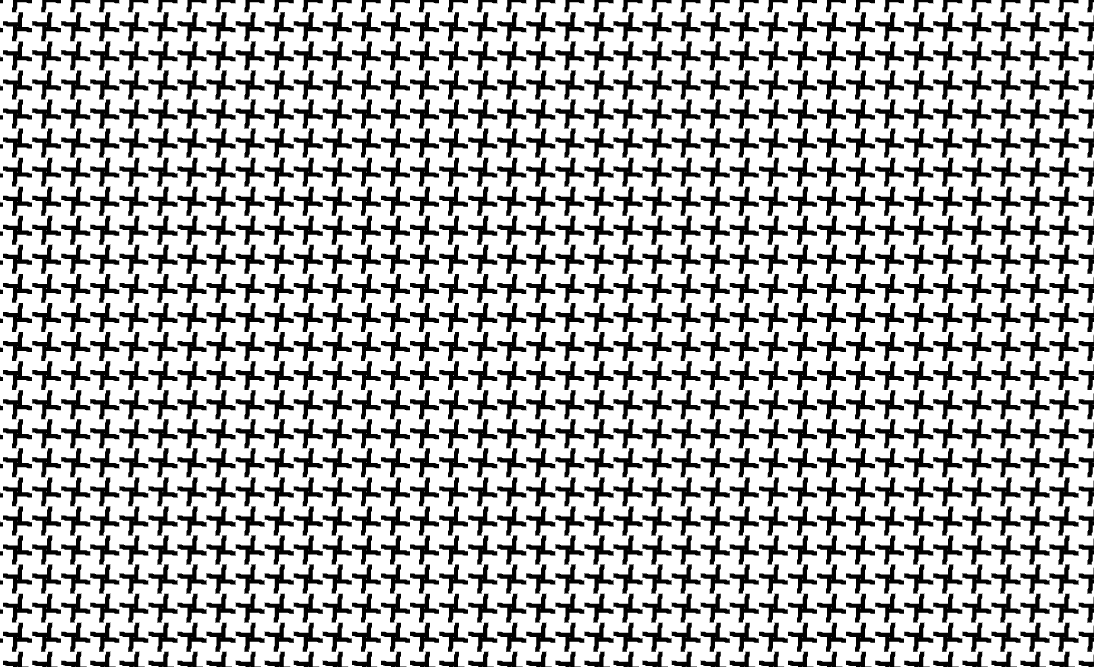

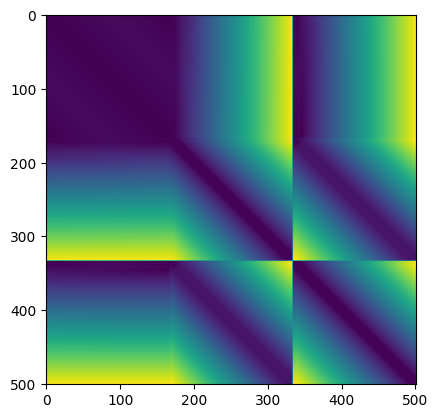

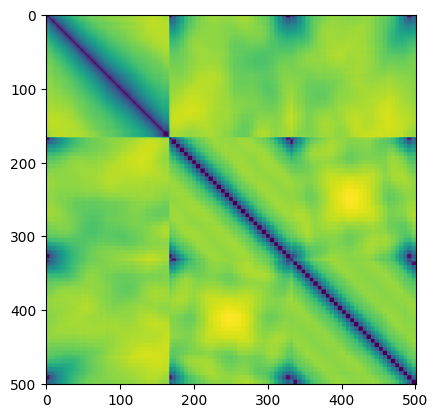

In [61]:
# Grab image from files
img = Image.open('images/C4pinwheel.png')
img = img.convert('L')
display(img)

# lens size, how much to stretch fund domain by
fund_domain = 30
a = 1
n_isoms = 500
c4_isoms = generate_C4_isoms(n_isoms,a)
c4_isoms_pixels = get_pixel_isom(c4_isoms, img, fund_domain, a)

D_ideal = pairwise_distances(c4_isoms, metric = C4_wrapper(a))
D_pixel = pairwise_distances(c4_isoms_pixels)

plt.figure()
plt.imshow(D_ideal)
plt.show()

plt.figure()
plt.imshow(D_pixel)
plt.show()


Try same thing with a=7 instead of a=1:

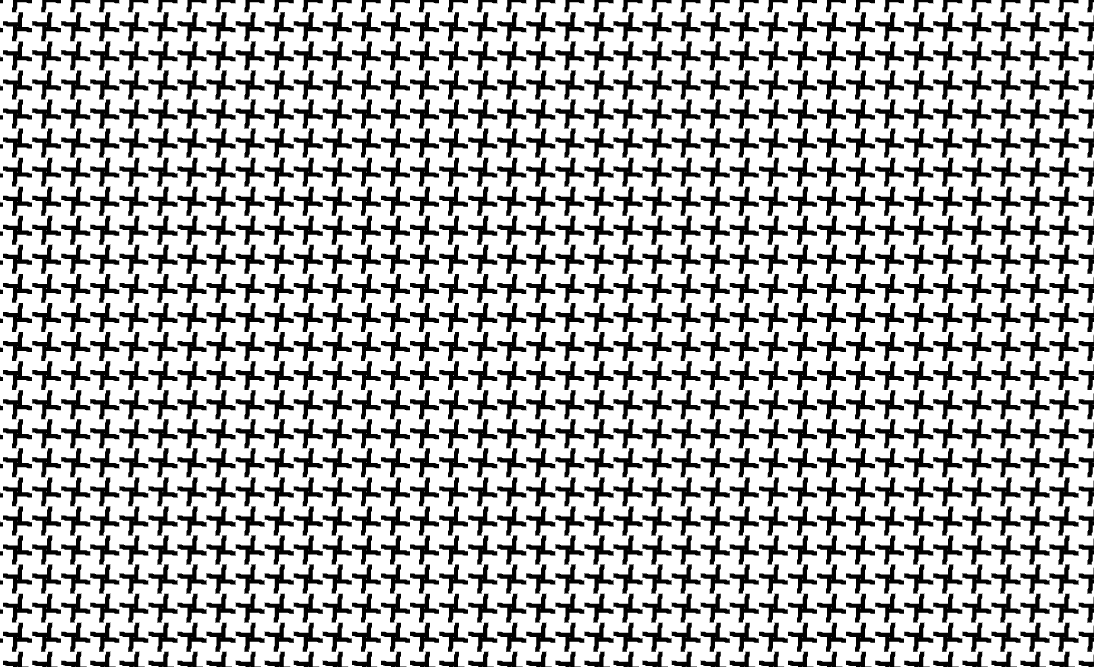

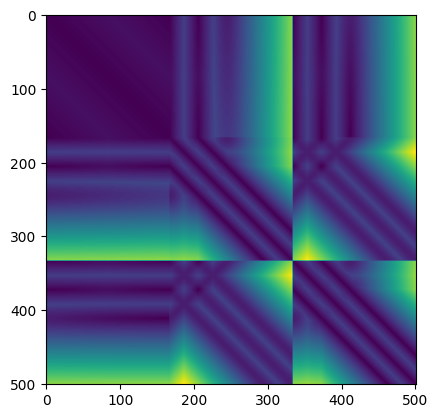

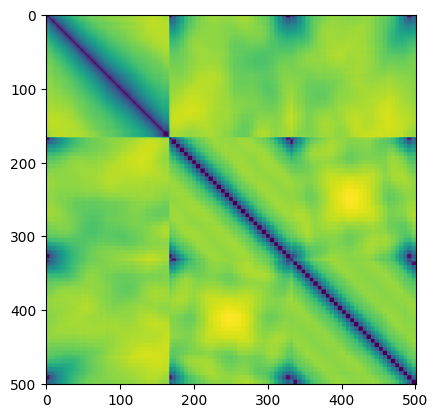

In [54]:
# Grab image from files
img = Image.open('images/C4pinwheel.png')
img = img.convert('L')
display(img)

# lens size, how much to stretch fund domain by
fund_domain = 30
a = 7
n_isoms = 500
c4_isoms = generate_C4_isoms(n_isoms,a)
c4_isoms_pixels = get_pixel_isom(c4_isoms, img, fund_domain, a)

D_ideal = pairwise_distances(c4_isoms, metric = C4_wrapper(a))
D_pixel = pairwise_distances(c4_isoms_pixels)

plt.figure()
plt.imshow(D_ideal)
plt.show()

plt.figure()
plt.imshow(D_pixel)
plt.show()

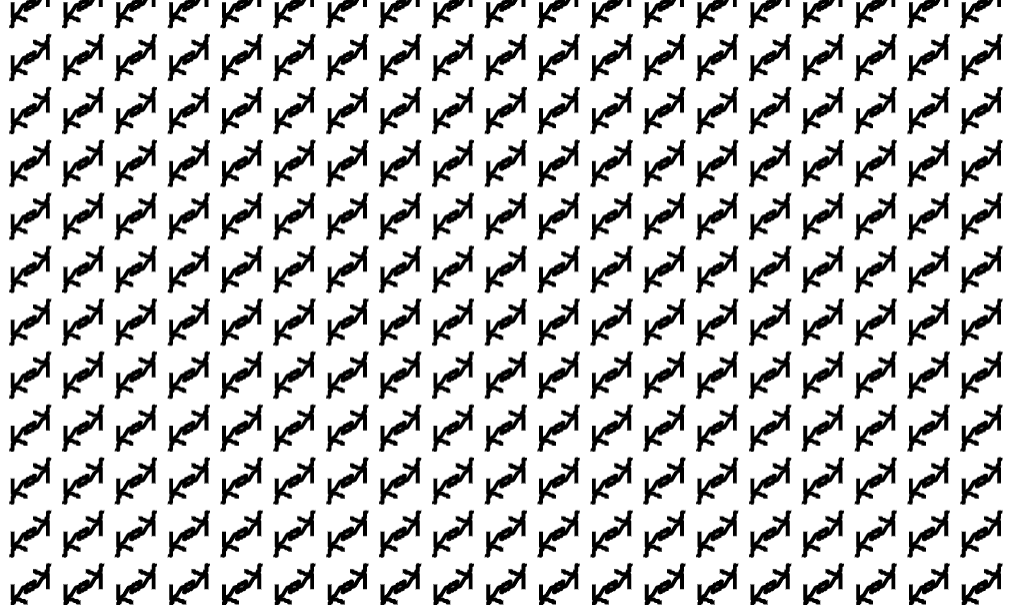

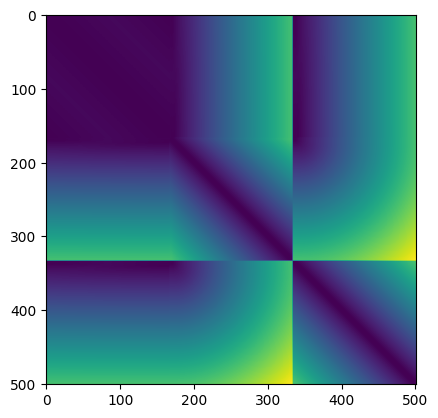

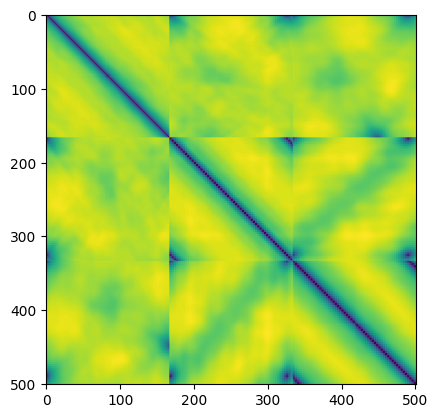

In [56]:
# Grab image from files
img = Image.open('images/squareC2.png')
img = img.convert('L')
display(img)

# lens size, how much to stretch fund domain by
fund_domain = 56
a = 1
n_isoms = 500
c2_isoms = generate_C2_isoms(n_isoms, a, a)
c2_isoms_pixels = get_pixel_isom(c2_isoms, img, fund_domain, a)

D_ideal = pairwise_distances(c2_isoms, metric = C2_wrapper((a,0),(0,a)))
D_pixel = pairwise_distances(c2_isoms_pixels)

plt.figure()
plt.imshow(D_ideal)
plt.show()

plt.figure()
plt.imshow(D_pixel)
plt.show()

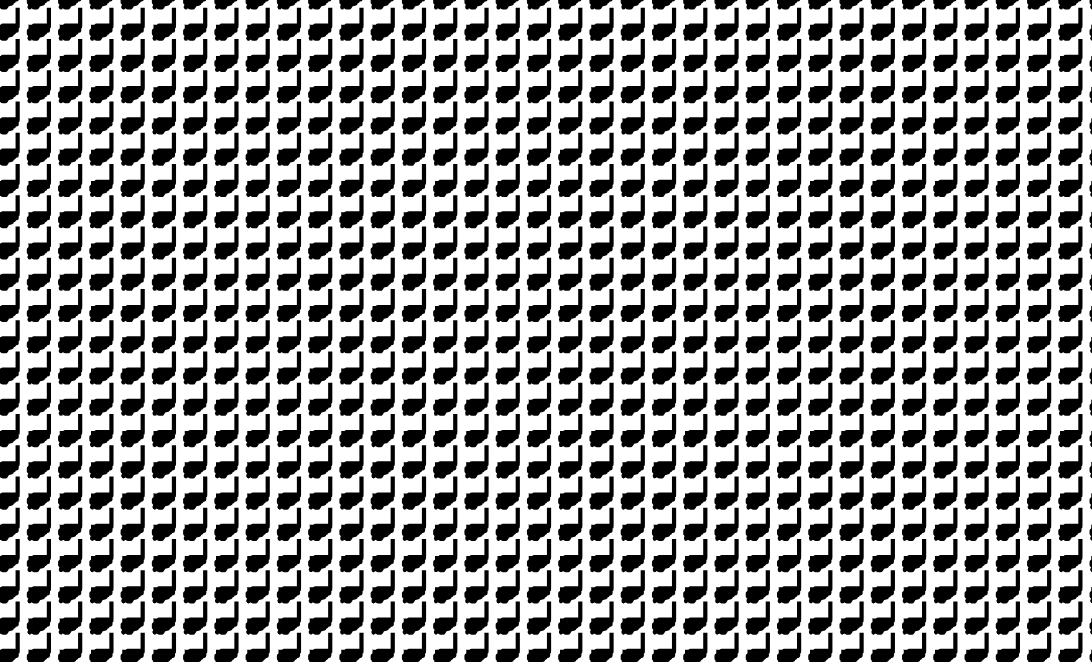

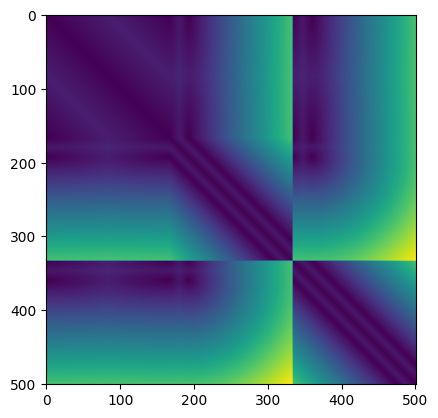

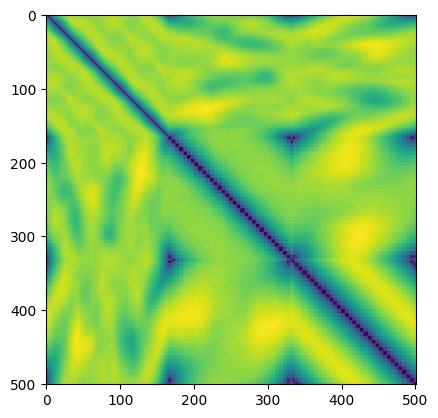

In [64]:
# Grab image from files
img = Image.open('images/C1music.png')
img = img.convert('L')
display(img)

# lens size, how much to stretch fund domain by
fund_domain = 32
a = 5
n_isoms = 500
c1_isoms = generate_C1_isoms(n_isoms, a, a)
c1_isoms_pixels = get_pixel_isom(c1_isoms, img, fund_domain, a)

D_ideal = pairwise_distances(c1_isoms, metric = C1_wrapper((a,0),(0,a)))
D_pixel = pairwise_distances(c1_isoms_pixels)

plt.figure()
plt.imshow(D_ideal)
plt.show()

plt.figure()
plt.imshow(D_pixel)
plt.show()